In [163]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Task 1: Load in Data

In [164]:
nobel = pd.read_csv('/Users/joseservin/DataCamp/Projects/Nobel_Prize/noble_prize_data.csv')
nobel.head(6)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


# Task 2: Counting

## Display possible shared prizes 

In [165]:
nobel.columns

Index(['Year', 'Category', 'Prize', 'Motivation', 'Prize Share', 'Laureate ID',
       'Laureate Type', 'Full Name', 'Birth Date', 'Birth City',
       'Birth Country', 'Sex', 'Organization Name', 'Organization City',
       'Organization Country', 'Death Date', 'Death City', 'Death Country'],
      dtype='object')

In [166]:
shared_prizes = nobel['Organization Country'].isna()

In [167]:
len(shared_prizes)

969

## Display male vs female count

In [168]:
nobel['Sex'].value_counts()

Male      893
Female     50
Name: Sex, dtype: int64

## Display number of prizes won by the Top 10 nationalities 

In [169]:
nationalities = nobel['Birth Country'].value_counts(sort=True)

In [170]:
nationalities.head(10)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

# Task 3: USA Dominance 

## Calculating the proportion of USA born winners per decade

In [171]:
nobel['usa_born_winner'] = np.where(nobel['Birth Country'] == 'United States of America', True, False)

In [172]:
nobel.dtypes

Year                     int64
Category                object
Prize                   object
Motivation              object
Prize Share             object
Laureate ID              int64
Laureate Type           object
Full Name               object
Birth Date              object
Birth City              object
Birth Country           object
Sex                     object
Organization Name       object
Organization City       object
Organization Country    object
Death Date              object
Death City              object
Death Country           object
usa_born_winner           bool
dtype: object

In [173]:
years = nobel['Year']

In [174]:
nobel['decade'] = (np.floor((years / 10))*10).astype(int)

In [175]:
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


# Task 4: USA Dominance Visualized 

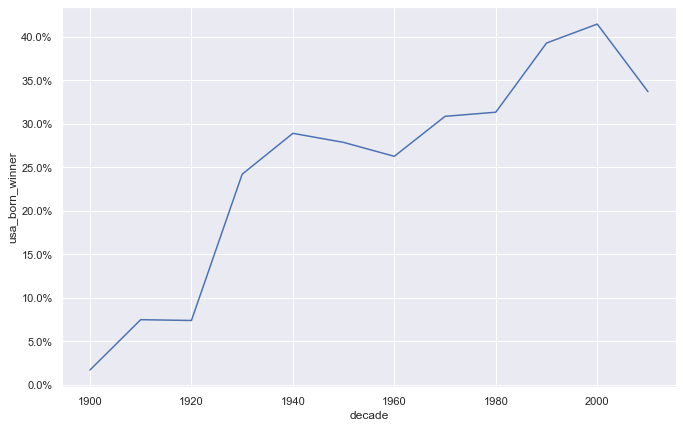

In [176]:
sns.set()
plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(data=prop_usa_winners, x='decade', y='usa_born_winner')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# Task 5: Gender of typical Nobel Prize winner

In [177]:
nobel['female_winner'] = np.where(nobel['Sex'] == 'Female', True, False)

In [178]:
prop_female_winners = nobel.groupby(['decade','Category'], as_index=False)['female_winner'].mean()


In [179]:
prop_female_winners.head()

,decade,Category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923


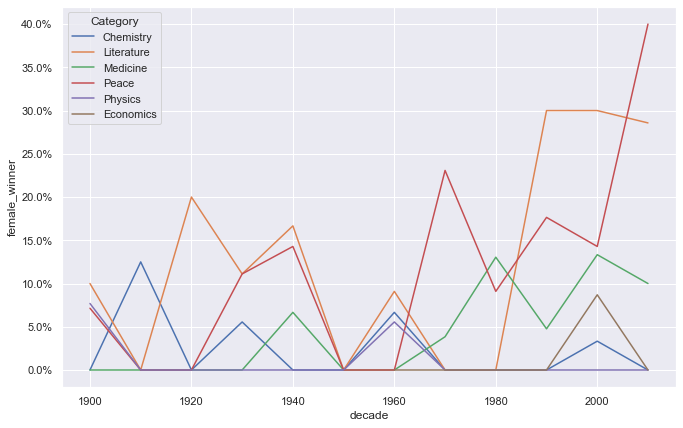

In [180]:
sns.set()
plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', hue='Category')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# Task 6: First women to win the Nobel Prize

In [181]:
female_only = nobel.query('Sex == "Female"')

In [182]:
first_female = female_only.nsmallest(1, 'Year')
first_female

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


# Task 7: Repeat Laureates

In [183]:
nobel.head(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False


In [184]:
nobel.groupby("Full Name").filter(lambda x: len(x["Full Name"]) >= 2)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,...,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,False,2010,False
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",...,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,True,2010,False


# Task 8: How old are you when you get the Prize?

In [185]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [188]:
nobel['Birth Date'] = pd.to_datetime(nobel['Birth Date'], errors='coerce')
nobel = nobel.dropna(subset=['Birth Date'])

In [189]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 968
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  938 non-null    int64         
 1   Category              938 non-null    object        
 2   Prize                 938 non-null    object        
 3   Motivation            867 non-null    object        
 4   Prize Share           938 non-null    object        
 5   Laureate ID           938 non-null    int64         
 6   Laureate Type         938 non-null    object        
 7   Full Name             938 non-null    object        
 8   Birth Date            938 non-null    datetime64[ns]
 9   Birth City            936 non-null    object        
 10  Birth Country         938 non-null    object        
 11  Sex                   938 non-null    object        
 12  Organization Name     718 non-null    object        
 13  Organization City   

In [194]:
nobel['age'] = nobel['Year'] - nobel['Birth Date'].dt.year

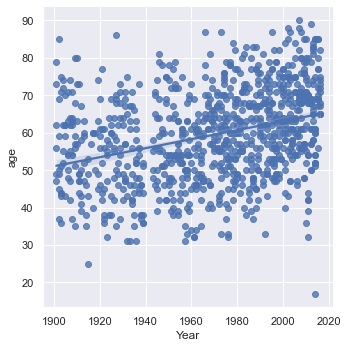

In [198]:
sns.lmplot(data=nobel, x= 'Year', y= 'age')